In [1]:
#!pip install pandas matplotlib seaborn spotipy

In [2]:
# ********** Import Statements ************************************************************ #
import sys
import spotipy
import spotipy.util as util

import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)

In [3]:
# Spotify user IDs for testing: these are public information.
user_ids = {'Cassie':'1242091675',
            'Caity':'12166088827',
            'Ben':'yaojxcyh5tczzlln0ygm9sfla',
            'Alex':'alex-soto',
            'Jason':'jason.albert'}

In [4]:
class Sameify:
    
    def __init__(self, user_id):
        self.id = user_id
        # Connect to Spotify
        self.sp = self.spotify_connect()
        self.playlists = self.get_all_playlists() 
        #self.playlist_tracks = self.get_all_playlist_tracks(self.playlists['playlist_id'][0])
        
        
    # Spotify credentials
    scope = 'user-library-read'
    #client_id removed
    #client_secret removed
    redirect_uri = 'http://localhost:1410/'

    # Connects to Spotify
    def spotify_connect(self):
        token = util.prompt_for_user_token(self.id,
                                           self.scope,
                                           self.client_id,
                                           self.client_secret,
                                           self.redirect_uri)

        sp = spotipy.Spotify(auth=token)
        return sp
    
    #def overstep_limit(self, item_id):

    def get_playlist_id(self, playlist_name):
        return self.playlists.loc[self.playlists['playlist_name'] == playlist_name,'playlist_id'].values[0]
    
    def get_playlist_name(self, playlist_id):
        return self.playlists.loc[self.playlists['playlist_id'] == playlist_id,'playlist_name'].values[0]
    
    def playlist_tracks(self, playlist_id):
        ret_df = pd.DataFrame()
        
        playlist = self.sp.user_playlist_tracks(self.id, playlist_id)
        playlist_name = self.get_playlist_name(playlist_id)
        tracks = playlist['items']
        
        while playlist['next']:
            playlist = self.sp.next(playlist)
            tracks.extend(playlist['items'])
            
        for track in tracks:
            x = track['track']
            data = {'playlist_id'  : playlist_id,
                    'playlist_name': playlist_name,
                    'track_name'   : x['name'],
                    'track_id'     : x['id'], 
                    'track_artist' : x['artists'][0]['name'], #[artist['name'] for artist in x['artists']]
                    'added_by'     : track['added_by']['id'],
                    'added_at'     : track['added_at']
                   }
            data_df = pd.DataFrame([data])
            song_deets = pd.DataFrame(self.sp.audio_features(data['track_id']))
            
            full_data = pd.concat([data_df, song_deets],axis=1)
            
            ret_df = ret_df.append(full_data)
        ret_df.reset_index(drop=True, inplace=True)
        return ret_df
            
        
    def get_all_playlists(self):
        playlists = pd.DataFrame()
        
        total = self.sp.user_playlists(self.id)['total'] #number of playlists
        limit = 50 # pull at a time
        
        for x in range(0, total, limit): # for each set of playlists
            new_playlist = self.sp.user_playlists(self.id, limit=limit, offset=x)
            for x in new_playlist['items']:
                items = {'playlist_name': x['name'],
                         'playlist_id'  : x['id'],
                         'owner_name'   : x['owner']['display_name'],
                         'owner_id'     : x['owner']['id'],
                         'num_tracks'   : x['tracks']['total'],
                         'collaborative': x['collaborative'],
                         }
                playlists = playlists.append(pd.DataFrame([items]))
        playlists.reset_index(drop=True, inplace=True)
        return playlists

In [5]:
def recursive_skim(obj, d={}, f=0):
    for x in obj.keys():
        level = obj[x]
        print(f, '\t'*f, '*', x, type(level), '[0] {}'.format(type(level[0] if type(level) == list else level)) if type(level) == list else '')
        if type(level) in (list, dict):
            level_next = level[0] if type(level) == list else level
            if type(level_next) in (list, dict):
                recursive_skim(level_next, d, f+1)

In [6]:
Cassie = Sameify(user_ids['Cassie'])
Caity = Sameify(user_ids['Caity'])
Ben = Sameify(user_ids['Ben'])
Alex = Sameify(user_ids['Alex'])
Jason = Sameify(user_ids['Jason'])

# How to see playlists

In [7]:
playlists = Alex.get_all_playlists()
playlists

,playlist_name,playlist_id,owner_name,owner_id,num_tracks,collaborative
0,Armin van Buuren Top 100,3By7AuSSloIQvnkDeNowcs,Armin van Buuren,arminvanbuurenofficial,100,False
1,"Best of 2000s Hits (2001, 2002, 2003, 2004, 20...",6Ui9LKzECczFSRvdkZhxxS,Filtr España,mejoresplaylistsspotify,90,False
2,´90 Totally Rock 1990-1999,1SNqguhGAf5P7aoWjN7YIk,Pablo Dintrâns Crivelli,12126553084,227,False
3,Trance,4ym34byUzS7fXL0y95yhNc,fernandohlee,fernandohlee,209,False
4,Friki,5uzEqyo4lzz94JmQ1LSHpP,Alex Soto,alex-soto,13,False
5,Epic Trance,2kxumcP5LbBPAW9YnRFYDV,fernandohlee,fernandohlee,19,False
6,Desamor,2SNXSkX6TNuGxGLpvmnPmA,Alex Soto,alex-soto,35,False
7,Electronica,7cLFKdkbZJVyjcIY3TQaXf,Alex Soto,alex-soto,11,False
8,Guapachoso,5uNeFEH0CX1rfz86FKgaH9,Alex Soto,alex-soto,11,False
9,Rock-Pop,3hP9IZ1yeFmKmN3yjj2xvD,Alex Soto,alex-soto,76,False


# How to see songs in a playlist

In [8]:
a_tracks = Alex.playlist_tracks(Alex.get_playlist_id('Desamor'))
a_tracks

,playlist_id,playlist_name,track_name,track_id,track_artist,added_by,added_at,danceability,energy,key,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,2SNXSkX6TNuGxGLpvmnPmA,Desamor,Con Solo un Beso,057t83pkKeTPT5dq2y8hv8,Ana Torroja,alex-soto,2015-05-14T05:33:19Z,0.552,0.592,6,...,0.1380,0.653,80.004,audio_features,057t83pkKeTPT5dq2y8hv8,spotify:track:057t83pkKeTPT5dq2y8hv8,https://api.spotify.com/v1/tracks/057t83pkKeTP...,https://api.spotify.com/v1/audio-analysis/057t...,247027,4
1,2SNXSkX6TNuGxGLpvmnPmA,Desamor,Llorar (feat. Mario Domm),7KffKVdLO4P8e4Yx8gDYgw,Jesse & Joy,alex-soto,2015-05-14T05:34:02Z,0.305,0.483,3,...,0.1120,0.233,169.655,audio_features,7KffKVdLO4P8e4Yx8gDYgw,spotify:track:7KffKVdLO4P8e4Yx8gDYgw,https://api.spotify.com/v1/tracks/7KffKVdLO4P8...,https://api.spotify.com/v1/audio-analysis/7Kff...,225797,3
2,2SNXSkX6TNuGxGLpvmnPmA,Desamor,Dónde está el amor (feat. Jesse & Joy),0CjaLvAqN97KPVWgOJ1vbD,Pablo Alborán,alex-soto,2015-05-14T05:34:32Z,0.597,0.848,4,...,0.3730,0.324,139.876,audio_features,0CjaLvAqN97KPVWgOJ1vbD,spotify:track:0CjaLvAqN97KPVWgOJ1vbD,https://api.spotify.com/v1/tracks/0CjaLvAqN97K...,https://api.spotify.com/v1/audio-analysis/0Cja...,233896,4
3,2SNXSkX6TNuGxGLpvmnPmA,Desamor,Acompáñame a Estar Solo,6Eb3FQ2eSSyENY5wJsY0Ot,Ricardo Arjona,alex-soto,2015-05-14T05:35:10Z,0.505,0.617,5,...,0.1890,0.237,172.882,audio_features,6Eb3FQ2eSSyENY5wJsY0Ot,spotify:track:6Eb3FQ2eSSyENY5wJsY0Ot,https://api.spotify.com/v1/tracks/6Eb3FQ2eSSyE...,https://api.spotify.com/v1/audio-analysis/6Eb3...,272573,4
4,2SNXSkX6TNuGxGLpvmnPmA,Desamor,Me Dejaste,10VpKdAdG43O9WLUYIAyKL,Ricardo Arjona,alex-soto,2015-05-14T05:35:51Z,0.691,0.674,7,...,0.3710,0.588,88.976,audio_features,10VpKdAdG43O9WLUYIAyKL,spotify:track:10VpKdAdG43O9WLUYIAyKL,https://api.spotify.com/v1/tracks/10VpKdAdG43O...,https://api.spotify.com/v1/audio-analysis/10Vp...,245827,4
5,2SNXSkX6TNuGxGLpvmnPmA,Desamor,Para No Decirte Adios,07PulmRHdsPuxnAOXKTjIA,La Quinta Estacion,alex-soto,2015-05-14T05:36:17Z,0.585,0.831,0,...,0.1690,0.838,93.063,audio_features,07PulmRHdsPuxnAOXKTjIA,spotify:track:07PulmRHdsPuxnAOXKTjIA,https://api.spotify.com/v1/tracks/07PulmRHdsPu...,https://api.spotify.com/v1/audio-analysis/07Pu...,214747,4
6,2SNXSkX6TNuGxGLpvmnPmA,Desamor,Perdición (Versión Acústica) [Directo Madrid] ...,6xs3cEHSgwrDvsII6g17E5,La Quinta Estacion,alex-soto,2015-05-14T05:37:10Z,0.403,0.406,7,...,0.9720,0.201,144.245,audio_features,6xs3cEHSgwrDvsII6g17E5,spotify:track:6xs3cEHSgwrDvsII6g17E5,https://api.spotify.com/v1/tracks/6xs3cEHSgwrD...,https://api.spotify.com/v1/audio-analysis/6xs3...,235893,4
7,2SNXSkX6TNuGxGLpvmnPmA,Desamor,Esta Noche No,3dgouf0SX54jxtRdn1oCXu,La Quinta Estacion,alex-soto,2015-05-14T05:37:35Z,0.555,0.929,2,...,0.1190,0.683,135.991,audio_features,3dgouf0SX54jxtRdn1oCXu,spotify:track:3dgouf0SX54jxtRdn1oCXu,https://api.spotify.com/v1/tracks/3dgouf0SX54j...,https://api.spotify.com/v1/audio-analysis/3dgo...,219827,4
8,2SNXSkX6TNuGxGLpvmnPmA,Desamor,Tu Peor Error,5ERTIuDvUxMnqUPGdaAjkq,La Quinta Estacion,alex-soto,2015-05-14T05:37:50Z,0.567,0.885,2,...,0.2780,0.849,97.936,audio_features,5ERTIuDvUxMnqUPGdaAjkq,spotify:track:5ERTIuDvUxMnqUPGdaAjkq,https://api.spotify.com/v1/tracks/5ERTIuDvUxMn...,https://api.spotify.com/v1/audio-analysis/5ERT...,167480,4
9,2SNXSkX6TNuGxGLpvmnPmA,Desamor,Por Ti,1foeacjwgWD6UMmirTXwL5,Belanova,alex-soto,2015-05-14T05:38:12Z,0.661,0.628,7,...,0.1150,0.454,137.971,audio_features,1foeacjwgWD6UMmirTXwL5,spotify:track:1foeacjwgWD6UMmirTXwL5,https://api.spotify.com/v1/tracks/1foeacjwgWD6...,https://api.spotify.com/v1/audio-analysis/1foe...,216333,4


# See original depth tree of playlist info

In [9]:
x = Alex.sp.user_playlist(Alex.id, Alex.get_playlist_id('Desamor'))
recursive_skim(x)

0  * collaborative <class 'bool'> 
0  * description <class 'str'> 
0  * external_urls <class 'dict'> 
1 	 * spotify <class 'str'> 
0  * followers <class 'dict'> 
1 	 * href <class 'NoneType'> 
1 	 * total <class 'int'> 
0  * href <class 'str'> 
0  * id <class 'str'> 
0  * images <class 'list'> [0] <class 'dict'>
1 	 * height <class 'int'> 
1 	 * url <class 'str'> 
1 	 * width <class 'int'> 
0  * name <class 'str'> 
0  * owner <class 'dict'> 
1 	 * display_name <class 'str'> 
1 	 * external_urls <class 'dict'> 
2 		 * spotify <class 'str'> 
1 	 * href <class 'str'> 
1 	 * id <class 'str'> 
1 	 * type <class 'str'> 
1 	 * uri <class 'str'> 
0  * primary_color <class 'NoneType'> 
0  * public <class 'bool'> 
0  * snapshot_id <class 'str'> 
0  * tracks <class 'dict'> 
1 	 * href <class 'str'> 
1 	 * items <class 'list'> [0] <class 'dict'>
2 		 * added_at <class 'str'> 
2 		 * added_by <class 'dict'> 
3 			 * external_urls <class 'dict'> 
4 				 * spotify <class 'str'> 
3 			 * href <class '

# See new depth tree of playlist info
I pulled out the values I felt were most useful, see above in the class definition

In [10]:
y = Alex.playlist_tracks(Alex.get_playlist_id('Desamor'))
recursive_skim(y)

0  * playlist_id <class 'pandas.core.series.Series'> 
0  * playlist_name <class 'pandas.core.series.Series'> 
0  * track_name <class 'pandas.core.series.Series'> 
0  * track_id <class 'pandas.core.series.Series'> 
0  * track_artist <class 'pandas.core.series.Series'> 
0  * added_by <class 'pandas.core.series.Series'> 
0  * added_at <class 'pandas.core.series.Series'> 
0  * danceability <class 'pandas.core.series.Series'> 
0  * energy <class 'pandas.core.series.Series'> 
0  * key <class 'pandas.core.series.Series'> 
0  * loudness <class 'pandas.core.series.Series'> 
0  * mode <class 'pandas.core.series.Series'> 
0  * speechiness <class 'pandas.core.series.Series'> 
0  * acousticness <class 'pandas.core.series.Series'> 
0  * instrumentalness <class 'pandas.core.series.Series'> 
0  * liveness <class 'pandas.core.series.Series'> 
0  * valence <class 'pandas.core.series.Series'> 
0  * tempo <class 'pandas.core.series.Series'> 
0  * type <class 'pandas.core.series.Series'> 
0  * id <class 'p

# Visualize a playlist

In [11]:
# simplify and melt playlist
def melt_df(df):
    new_df = df[['playlist_name', 'track_id', 'acousticness', 'danceability', 'energy', 'liveness', 'valence', 'speechiness']]
    return new_df.melt(id_vars=['playlist_name', 'track_id'])

In [12]:
# melt playlist
alex_playlist_melt = melt_df(a_tracks)
alex_playlist_melt

,playlist_name,track_id,variable,value
0,Desamor,057t83pkKeTPT5dq2y8hv8,acousticness,0.03180
1,Desamor,7KffKVdLO4P8e4Yx8gDYgw,acousticness,0.21800
2,Desamor,0CjaLvAqN97KPVWgOJ1vbD,acousticness,0.17300
3,Desamor,6Eb3FQ2eSSyENY5wJsY0Ot,acousticness,0.18300
4,Desamor,10VpKdAdG43O9WLUYIAyKL,acousticness,0.17200
5,Desamor,07PulmRHdsPuxnAOXKTjIA,acousticness,0.24900
6,Desamor,6xs3cEHSgwrDvsII6g17E5,acousticness,0.02080
7,Desamor,3dgouf0SX54jxtRdn1oCXu,acousticness,0.04240
8,Desamor,5ERTIuDvUxMnqUPGdaAjkq,acousticness,0.02850
9,Desamor,1foeacjwgWD6UMmirTXwL5,acousticness,0.00166


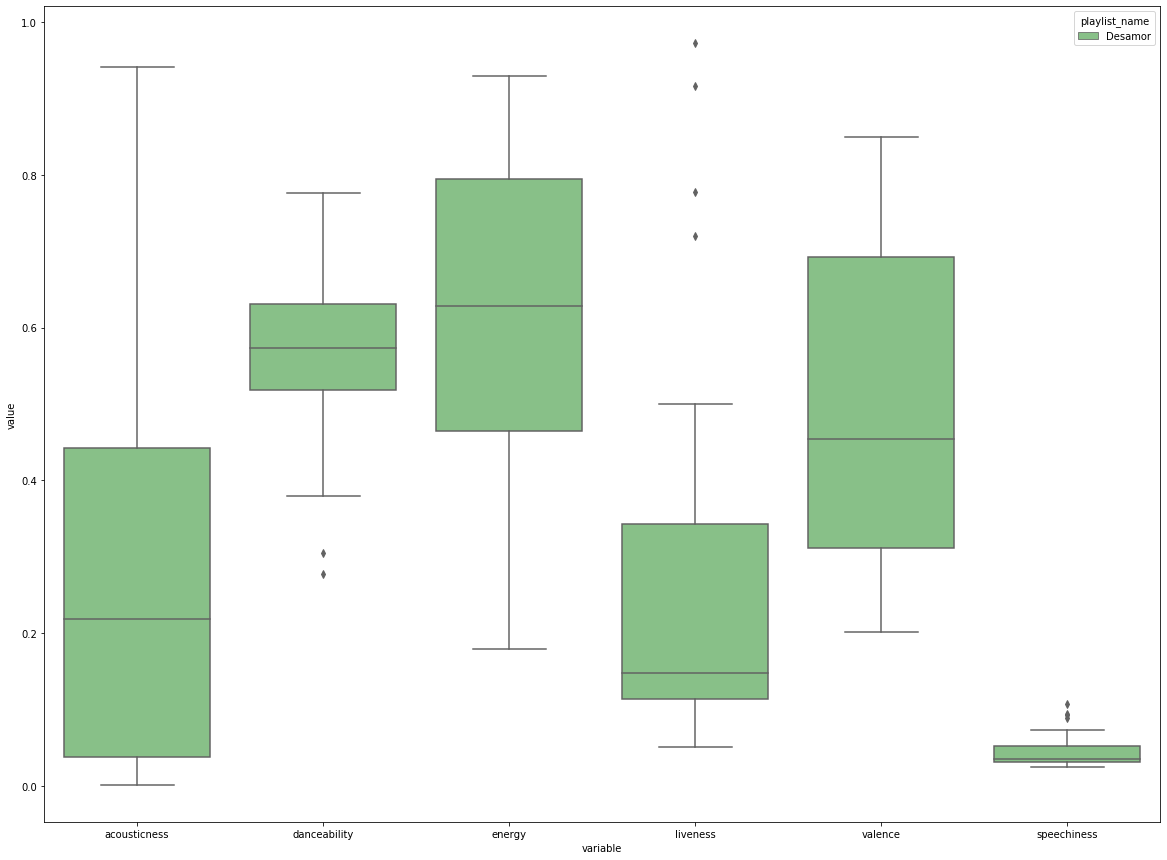

In [13]:
# display musical information
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.boxplot(x='variable', y='value', hue='playlist_name', data=alex_playlist_melt, palette='Accent')

# Compare playlists

In [14]:
# pull french playlist from cassie
c_tracks = Cassie.playlist_tracks(Cassie.get_playlist_id('Mes Favoris Français'))

# melt playlist
cassie_playlist_melt = melt_df(c_tracks)
cassie_playlist_melt

,playlist_name,track_id,variable,value
0,Mes Favoris Français,0kWDULPj6Q8Gzz6IYSA1Fc,acousticness,0.6080
1,Mes Favoris Français,5G4ePLj9Xn7JhtFiiwOkeQ,acousticness,0.5410
2,Mes Favoris Français,2pUztExanG23DOgRLixEkH,acousticness,0.4880
3,Mes Favoris Français,1V2BWxbAL6snhkfJl6VorQ,acousticness,0.7870
4,Mes Favoris Français,6JnLcXXUZU7dXglmMURGSG,acousticness,0.2900
5,Mes Favoris Français,3JpvrDXLt7dXuOIFJZFP2W,acousticness,0.9720
6,Mes Favoris Français,5H3ChVfItCaDpj1vPbigyX,acousticness,0.8290
7,Mes Favoris Français,5MyjXdc0lRmr1DdfxH0tVa,acousticness,0.7810
8,Mes Favoris Français,1JGmXTw7GXNloXILEgXbtv,acousticness,0.4290
9,Mes Favoris Français,1vpYFK0twBvjgezr2pOca2,acousticness,0.9690


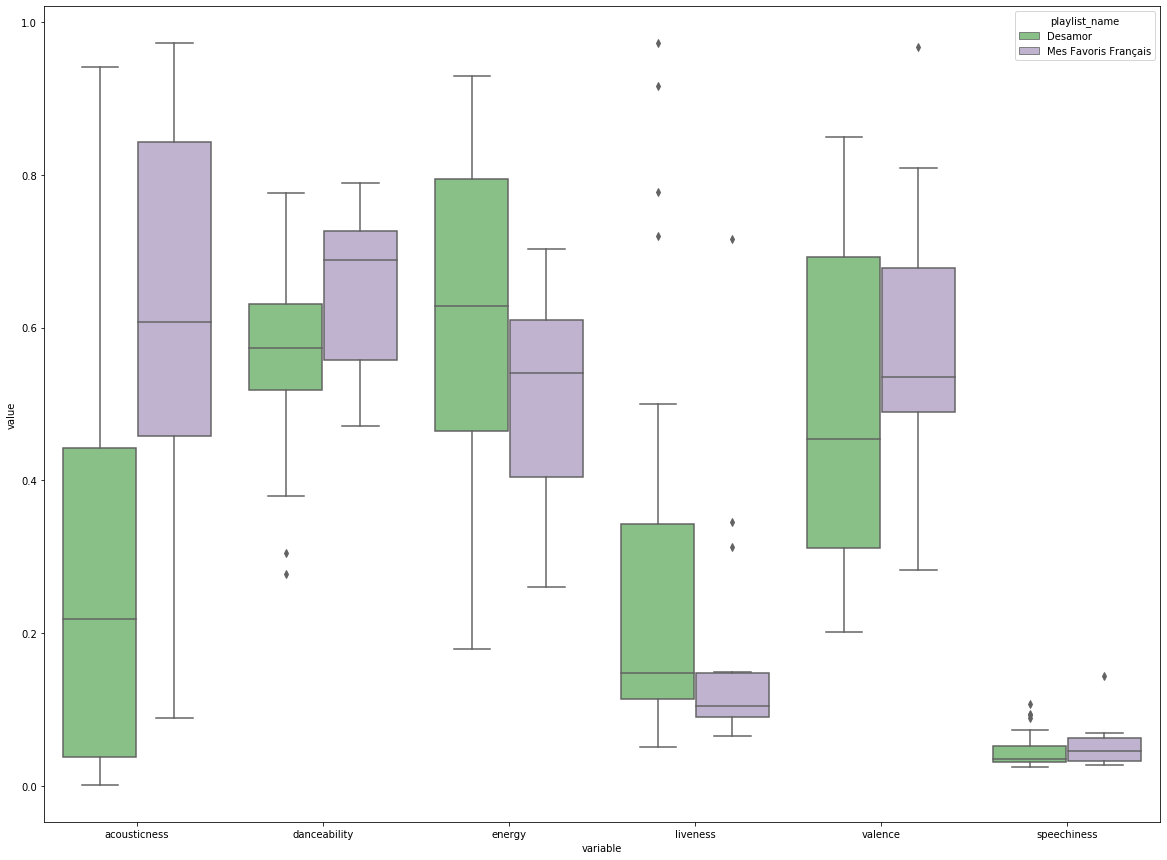

In [15]:
melted = alex_playlist_melt.append(cassie_playlist_melt)

# display musical information
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.boxplot(x='variable', y='value', hue='playlist_name', data=melted, palette='Accent')